In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import cv2
from google.colab.patches import cv2_imshow

### Detecting Outliers

In [2]:
# plt.figure(figsize=(10,8),dpi=150)
# sns.displot(data = df, bins = 30)
# plt.xticks(rotation=45)

In [3]:
# plt.figure(figsize=(12,15),dpi=180)
# sns.boxplot(data = df)
# plt.xticks(rotation=45)

In [4]:
# df.describe()

In [5]:
# calculating IQR for saleprice
# df[(df[feature] < Q1 - threshold * IQR) | (df[feature] > Q3 + threshold * IQR)]
# iqr = 214000 - 129975
# lower_lim = 129975 - 1.5*iqr
# lower_lim
# higher_lim = 214000 + 2.5*iqr
# higher_lim

In [6]:
# df[df['SalePrice'] > higher_lim]

In [7]:
# z_scores = np.abs(stats.zscore(df['SalePrice']))
# z_scores

In [8]:
# threshold = 3
# outliers = df[z_scores > threshold]
# outliers

In [9]:
# null = df.isnull().sum()
# null_df = null[null != 0].to_frame()
# null_df

In [10]:
def load_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.resize(img, (600, 500))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img, gray
def display_img(img):
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

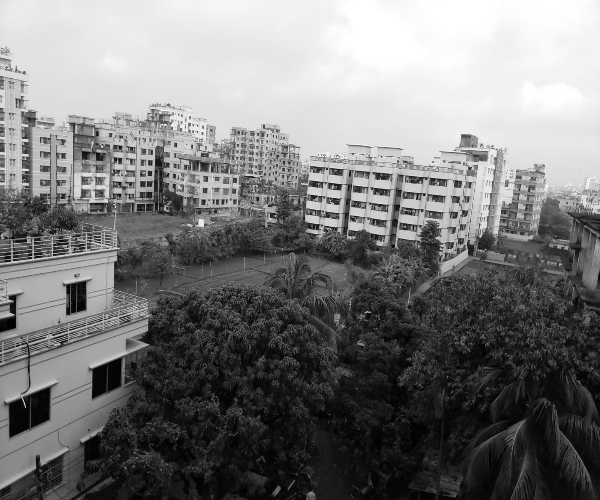

In [11]:
image = cv2.imread('/content/WhatsApp Image 2023-12-08 at 9.41.23 AM (1) - Copy.jpeg',0)
image = cv2.resize(image, (600, 500))
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

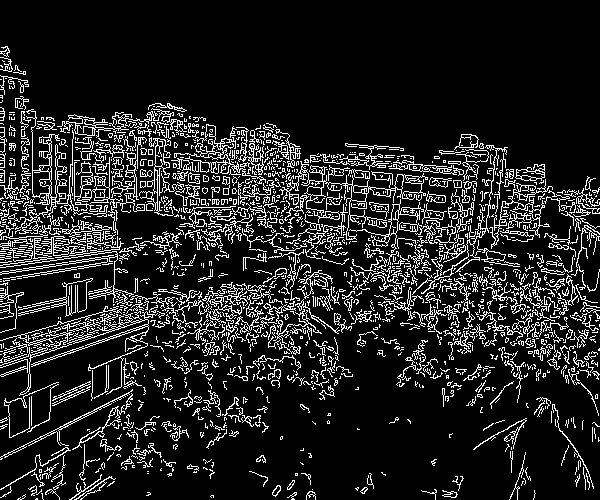

In [12]:
edges = cv2.Canny(image, 100, 200)
cv2_imshow(edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

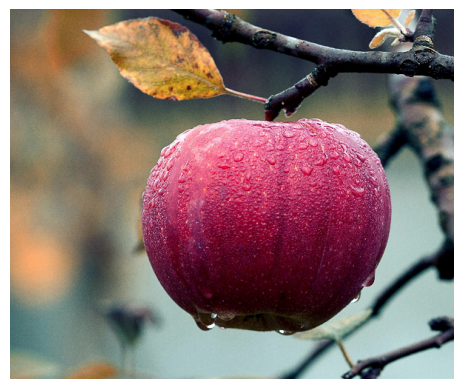

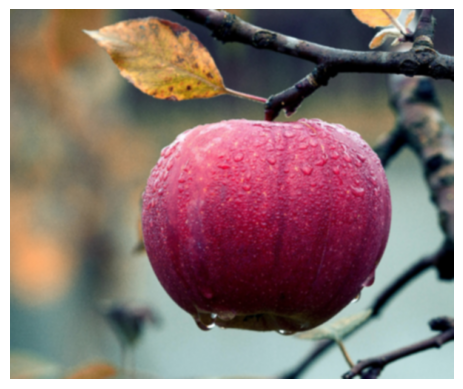

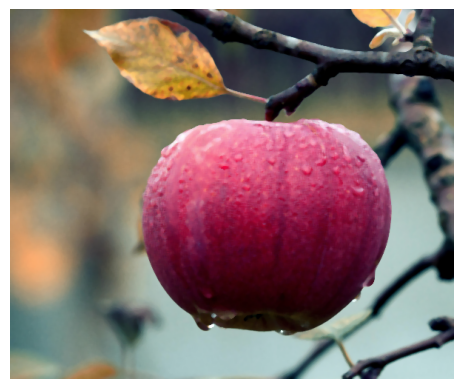

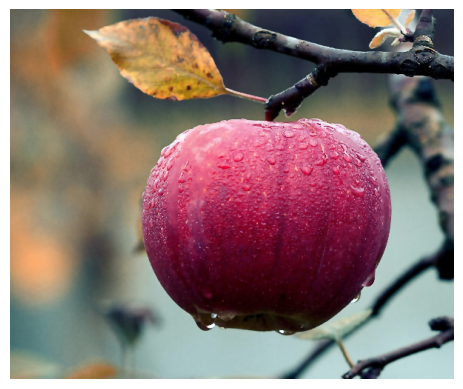

In [13]:
#Denosing image
image2 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
image2 = cv2.resize(image2, (600, 500))

#blur to denoise the image
denoised_image = cv2.GaussianBlur(image2, (5, 5), -1)
denoised_image2 = cv2.medianBlur(image2,5)
denoised_image3 = cv2.bilateralFilter(image2, 5, 75, 75)

display_img(image2)
display_img(denoised_image)
display_img(denoised_image2)
display_img(denoised_image3)


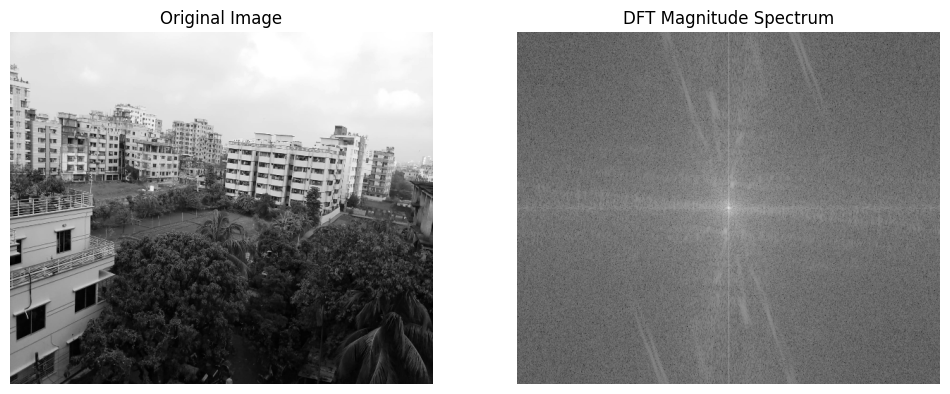

In [14]:
# Perform Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Compute magnitude spectrum (logarithmic scale for better visualization)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
# print('real part:', dft_shift[:, :, 0][0][0],'imaginary part:',dft_shift[:, :, 1][0][0])
# Display the original image and its DFT magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')
plt.show()

### Histogram color correction

Original


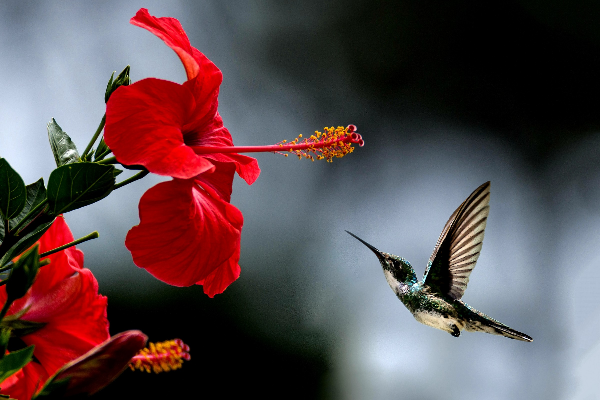

HSV


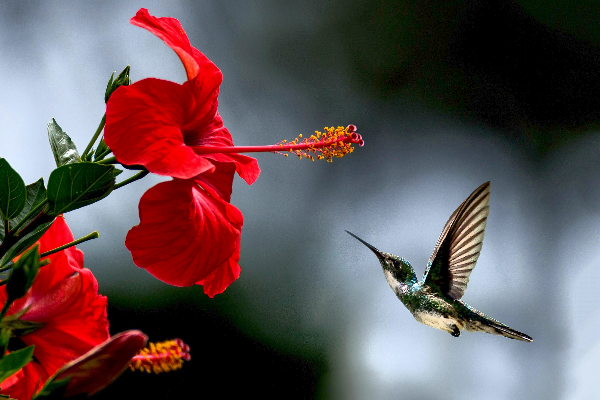

LAB IMG


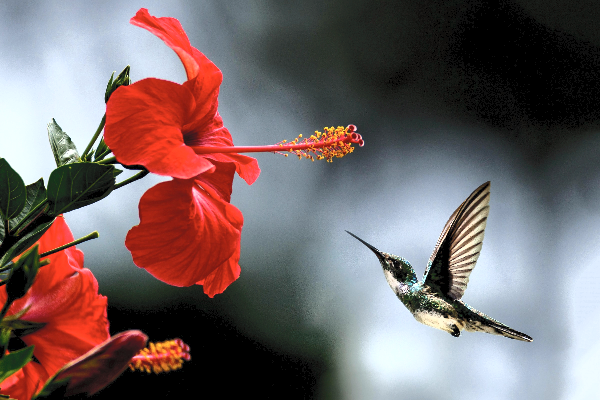

In [15]:
im3 = cv2.imread('/content/20190803_101711_optimized.jpg')
im3 = cv2.resize(im3, (600, 400))

# Convert the image to the LAB color space
lab_image = cv2.cvtColor(im3, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels (L - Lightness, A - Green to Red, B - Blue to Yellow)
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply histogram equalization to the L channel
l_channel_eq = cv2.equalizeHist(l_channel)

# Merge the equalized L channel with the original A and B channels
lab_eq_image = cv2.merge((l_channel_eq, a_channel, b_channel))

# Convert the equalized LAB image back to BGR color space
corrected_image = cv2.cvtColor(lab_eq_image, cv2.COLOR_LAB2BGR)


# another way,hsv hist correction
hsv = cv2.cvtColor(im3.copy(),cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
hsv_corrected = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
print('Original')
cv2_imshow( im3)
print('HSV')
cv2_imshow(hsv_corrected)
print('LAB IMG')
cv2_imshow(corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


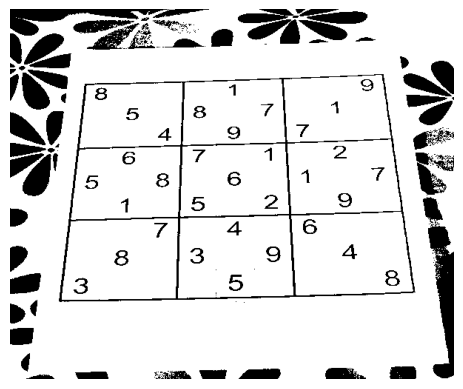

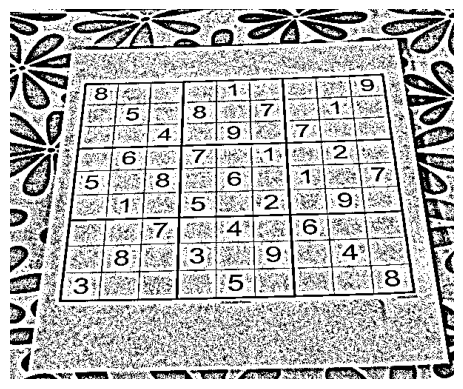

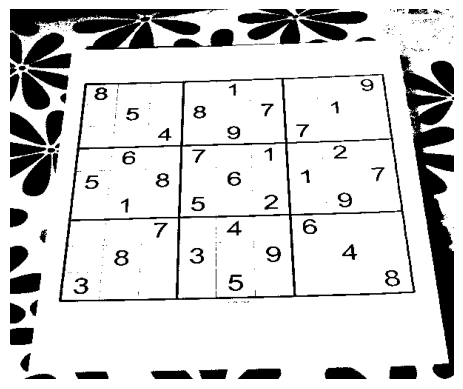

In [16]:
suduku,suduku_gray = load_img('/content/sudoku.jpg')
# Binary Thresholding
_, binary_threshold = cv2.threshold(suduku_gray, 127, 255, cv2.THRESH_BINARY)

# Adaptive Thresholding
adaptive_threshold = cv2.adaptiveThreshold(suduku_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# Otsu's Thresholding
_, otsu_threshold = cv2.threshold(suduku_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

display_img(binary_threshold)
display_img(adaptive_threshold)
display_img(otsu_threshold)

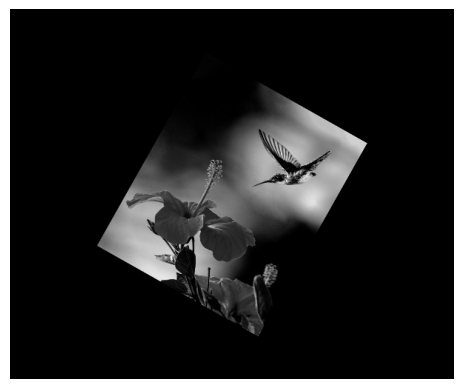

In [17]:
# Rotate an image
_,gray_image = load_img('/content/20190803_101711_optimized.jpg')
rows, cols = gray_image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 60.58, 0.5)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (cols, rows))
display_img(rotated_image)

###corner detection


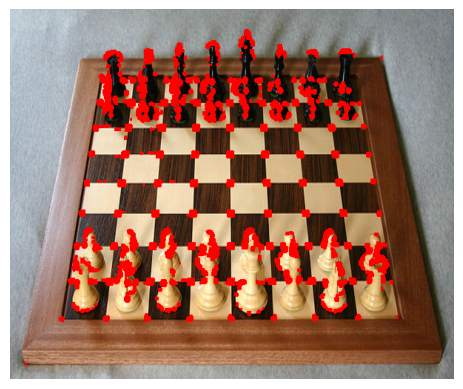

In [18]:
chess_img,chess_gray = load_img('/content/real_chessboard.jpg')
chess_gray = np.float32(chess_gray)
dst = cv2.cornerHarris(chess_gray,blockSize=5,ksize=9,k=0.005)
dst = cv2.dilate(dst,None)
chess_img[dst > 0.01 * dst.max()] = [0,0,255]
display_img(chess_img)

### Edge detection


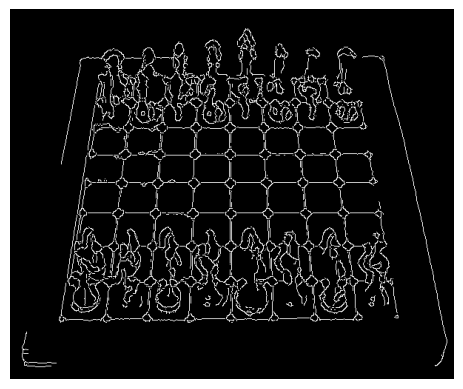

In [19]:
median = np.median(chess_img)
lower = int(max(0,0.7 *  median))
higher = int(min(255,1.30 *  median))
#we neet to blurr before edge detection
blured_chess = cv2.blur(chess_img,ksize=(5,5))
edges = cv2.Canny(blured_chess,threshold1=lower,threshold2 =  higher)
display_img(edges)

### Contour detection

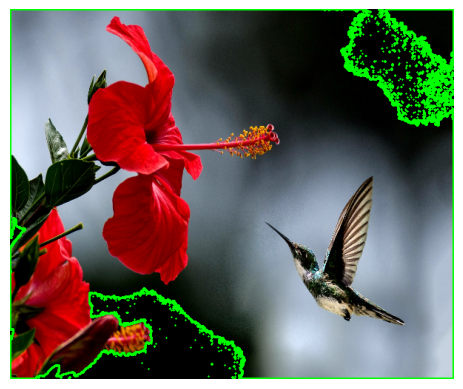

In [20]:
image_chess,gray_chess = load_img('/content/20190803_101711_optimized.jpg')
# contours, hierarchy = cv2.findContours(gray_chess, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(gray_chess, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = image_chess.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)
display_img(contour_img)

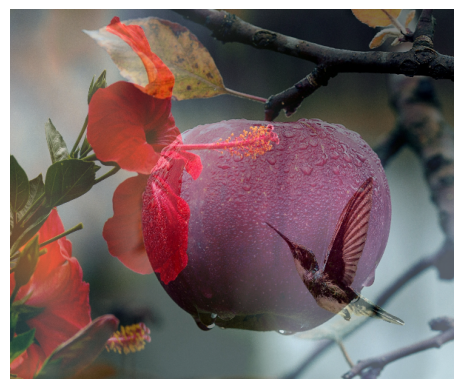

In [21]:
# Read the two images
ima1 = cv2.imread('/content/20190803_142007_optimized_optimized_optimized.jpg')
ima2 = cv2.imread('/content/20190803_101711_optimized.jpg')

# Resize image2 to match the dimensions of image1 (optional, if needed)
ima2 = cv2.resize(ima2, (ima1.shape[1], ima1.shape[0]))

# Blending the images (using equal weightage for both images)
alpha = 0.5  # Weight for the first image
beta = 0.5   # Weight for the second image
gamma = 0    # Scalar added to each sum
blended_image = cv2.addWeighted(ima1, alpha, ima2, beta, gamma)
blended_image = cv2.resize(blended_image,(600,500))

display_img(blended_image)


AND


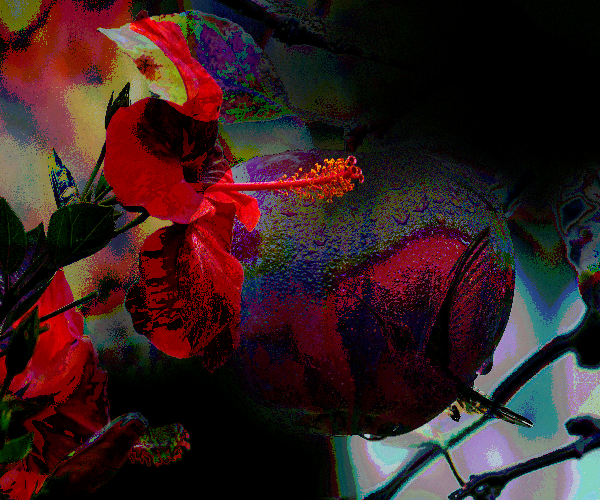

OR


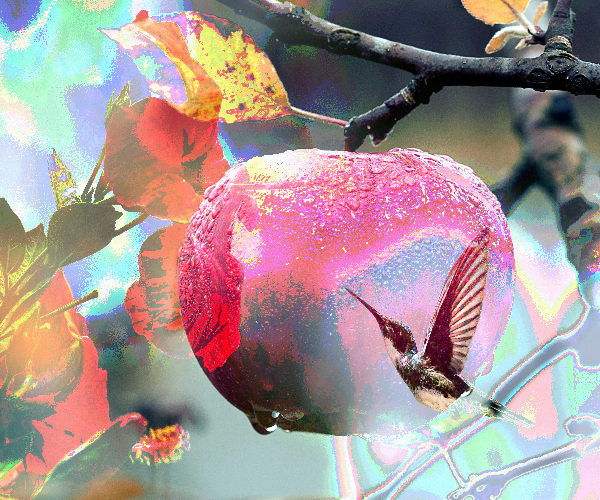

NOT


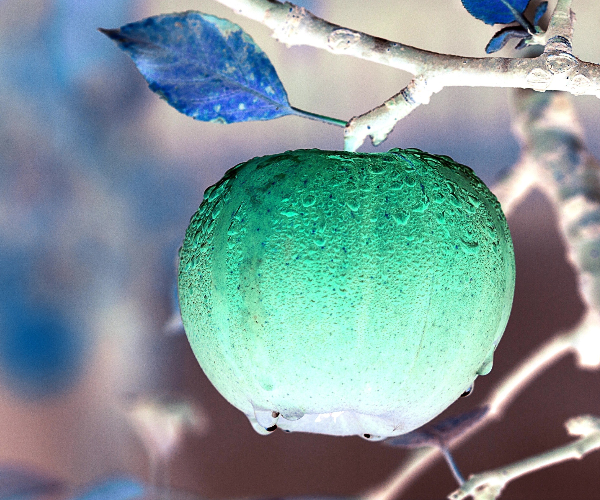

In [22]:
#Bitwise operation
ima1 = cv2.resize(ima1,(600,500))
ima2 = cv2.resize(ima2,(600,500))
bitwise_and = cv2.bitwise_and(ima1, ima2) #Highlights common areas or features present in both images.
bitwise_or = cv2.bitwise_or(ima1, ima2) #Combines areas or features present in either image.
bitwise_not = cv2.bitwise_not(ima1)
print('AND')
cv2_imshow(bitwise_and)
print('OR')
cv2_imshow(bitwise_or)
print('NOT')
cv2_imshow(bitwise_not)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Morphological operation(dilation,errosion,opening,closing)

dilation


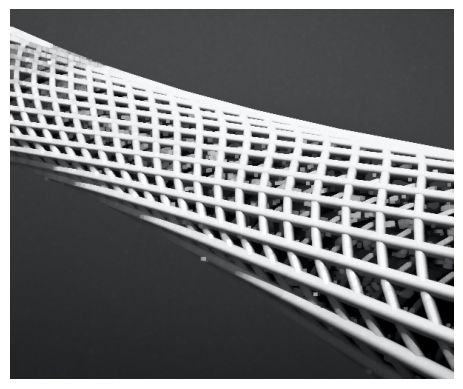

errosion


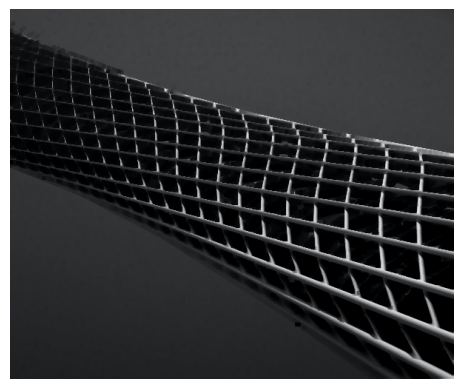

opening


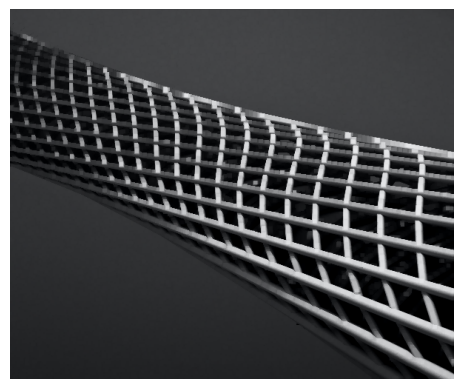

closing


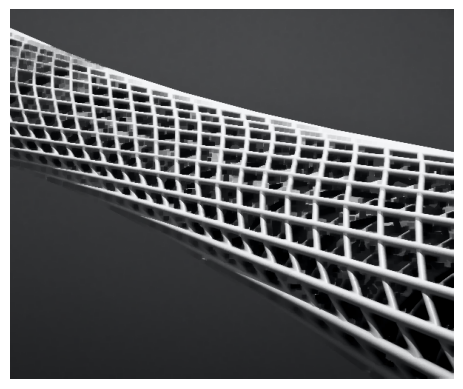

In [42]:
structure,gray_strutcure  = load_img('/content/xiong-yan-S7sPzZcM0y4-unsplash.jpg')
strctr1 = structure.copy()
strctr2 = structure.copy()
strctr3 = structure.copy()
strctr4 = structure.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# Performing dilation operation on the image
dilated_image = cv2.dilate(strctr1, kernel, iterations=1)
# erosion operation on the image
eroded_image = cv2.erode(strctr2, kernel, iterations=1)
# Performing opening operation on the image
opened_image = cv2.morphologyEx(strctr3, cv2.MORPH_OPEN, kernel)
# Performing closing operation on the image
closed_image = cv2.morphologyEx(strctr4, cv2.MORPH_CLOSE, kernel)

print('dilation')
display_img(dilated_image)
print('errosion')
display_img(eroded_image)
print('opening')
display_img(opened_image)
print('closing')
display_img(closed_image)

In [ ]:
# erosion operation on the image
strctr2 = structure.copy()
eroded_image = cv2.erode(strctr2, kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(eroded_image, cv2.COLOR_BGR2RGB))
plt.title('Eroded Image')
plt.show()


### Object segmentation using GrabCut Algorithm:

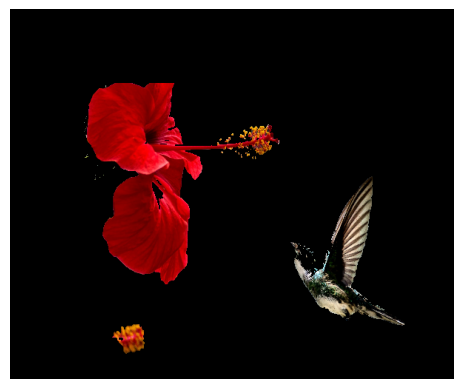

In [23]:
# Read the image
image5 = cv2.imread('/content/20190803_101711_optimized.jpg')
image5 = cv2.resize(image5,(600,500))

# Define a rectangle around the object you want to segment
rect = (100, 100, 450, 450)  # Format: (x, y, width, height)

# Initialize the mask
mask = np.zeros(image5.shape[:2], np.uint8)

# Create background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Apply GrabCut algorithm
cv2.grabCut(image5, mask, rect, bgd_model, fgd_model, iterCount=6, mode=cv2.GC_INIT_WITH_RECT)

# Create a mask where 0 and 2 are considered the background and the rest as foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Apply the mask to the original image5
result = image5 * mask2[:, :, np.newaxis]

display_img(result)
# cv2.imwrite('bakcground_removed.jpeg',result)

### Object segmentation using Watershed Algorithm:

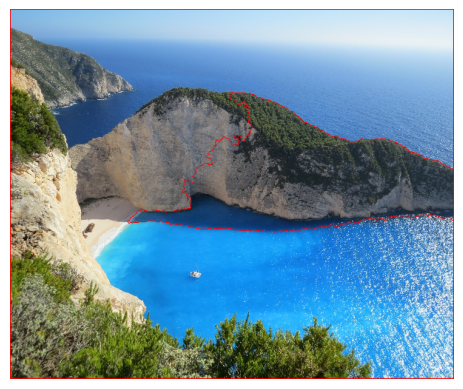

In [24]:
image5,gray = load_img('/content/win 10.jpg')

#thresholding
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2) #Noise reduction

# Identify sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Identify sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# display_img(dist_transform)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
# display_img(sure_fg)
# Identify areas where we are uncertain
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Create markers for watershed algorithm
_, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 255] = 0

# Apply watershed algorithm
markers = cv2.watershed(image5.copy(), markers)
image5[markers == -1] = [0, 0, 255]
display_img(image5)

### Custom seeds for watershed algorithm

In [25]:
# b,g,r = cv2.split(image5)
# color_img = cv2.merge((b,g,r))
# cv2_imshow( color_img)
# cv2_imshow(b)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [26]:
# blank_img = np.random.randint(0, 255, size=(512, 512, 3), dtype=np.uint8)
# blank_img = np.random.rand(512, 512, 3).astype(np.float32)
# plt.imshow(blank_img)

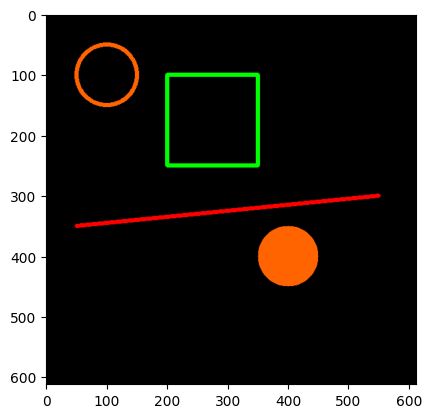

In [27]:
bimg = np.zeros(shape = (612,612,3),dtype=np.int32)
cv2.rectangle(bimg,pt1=(200,100),pt2=(350,250),color =(0,255,0),thickness = 5)
cv2.line(bimg,pt1=(50,350),pt2=(550,300),color =(255,0,0),thickness = 5)
cv2.circle(bimg,center=(100,100),radius=50,color =(255,100,0),thickness = 5)
cv2.circle(bimg,center=(400,400),radius=50,color =(255,100,0),thickness = -1)
plt.imshow(bimg)

In [28]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Transform the 1D array into a 3D array with shape (-1, 1, 2)
three_d_array = arr.reshape(-1, 1, 2)
three_d_array

array([[[ 1,  2]],

       [[ 3,  4]],

       [[ 5,  6]],

       [[ 7,  8]],

       [[ 9, 10]],

       [[11, 12]]])

Gaussian Kernel:
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


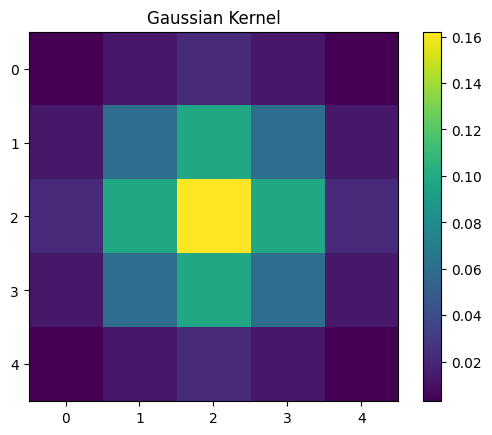

In [29]:
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

size = 5  # Kernel size (e.g., 5x5)
sigma = 1  # Standard deviation

kernel = gaussian_kernel(size, sigma)
print("Gaussian Kernel:")
print(kernel)
# Visualize the Gaussian kernel as an image
plt.imshow(kernel, cmap='viridis', interpolation='none')
plt.title('Gaussian Kernel')
plt.colorbar()
plt.show()

### Feature  matching using SIFT(Scale Invariant Feature Transform)

In [30]:
reese,reese_gray = load_img('/content/reeses_puffs.png')
cheros,cheros_gray = load_img('/content/many_cereals.jpg')

In [31]:
sift = cv2.xfeatures2d.SIFT_create()

In [32]:
k1,d1 = sift.detectAndCompute(reese_gray,None)
k2,d2 = sift.detectAndCompute(cheros_gray,None)

In [33]:
brforce = cv2.BFMatcher()

In [34]:
matches = brforce.knnMatch(d1,d2,k = 2)

In [35]:
# matches = matches[:20] # so many matches so i took the first few
# print(f"distance: {matches[0][0].distance}")
# print(matches[0])

In [36]:
#less distance better match
good_match = []
for match1,match2 in matches:
  if match1.distance < 0.75*match2.distance:
    good_match.append([match1])
good_match = good_match[:20]

In [37]:
sift_match = cv2.drawMatchesKnn(reese_gray,k1,cheros_gray,k2,good_match,None,flags=2)

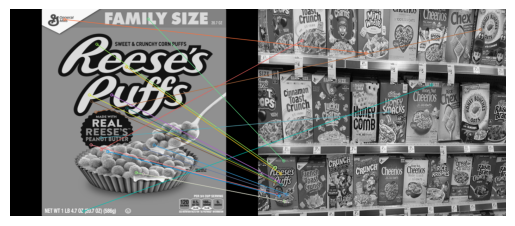

In [38]:
display_img(sift_match)